<a href="https://colab.research.google.com/github/Yoon2596/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EA%B3%BC%EC%A0%9C/%EA%B3%BC%EC%A0%9C_0724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVC 커널

- 선형 커널 (Linear Kernel): 선형 커널은 간단하고 빠르며, 데이터가 선형적으로 구분될 때 좋은 성능을 보입니다. Wine 데이터셋에서 선형 커널이 적합한지 확인해보면, 일부 클래스 간의 분류가 충분하지 않을 수 있습니다.
- 다항식 커널 (Polynomial Kernel): 다항식 커널은 비선형적으로 분포된 데이터를 더 잘 처리할 수 있습니다. 차수가 증가함에 따라 모델이 더 복잡해지고, 데이터의 패턴을 더 잘 포착할 수 있지만, 과적합의 위험이 있습니다.
- RBF 커널 (RBF Kernel): RBF 커널은 비선형적인 경계를 가진 데이터에서 가장 효과적입니다. Wine 데이터셋의 복잡한 패턴을 잘 포착할 수 있으며, 높은 성능을 기대할 수 있습니다.

Task1_0724. Wine 데이터셋에 대하여 SVM 모델에 3개의 커널을 적용하여 학습 및 평가 결과를 출력하세요.

Model: Linear Kernel
linear Accuracy: 0.9815
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



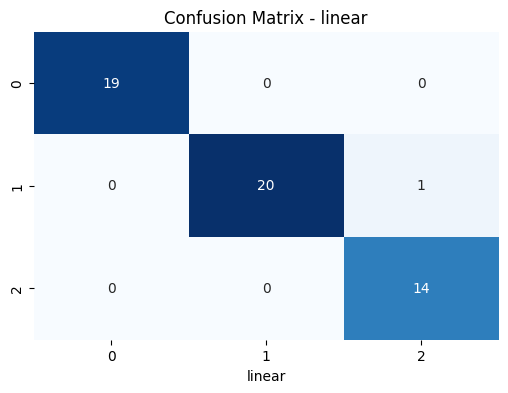


Model: Polynomial Kernel
poly Accuracy: 0.9630
[[17  2  0]
 [ 0 21  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



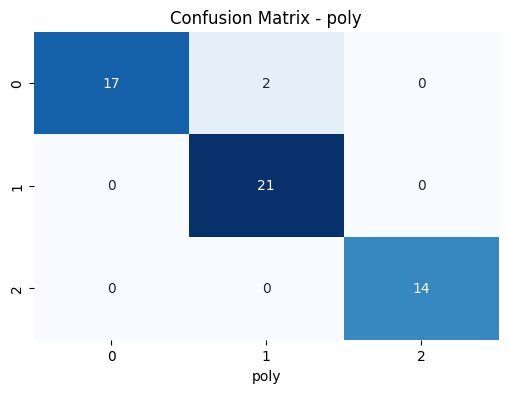


Model: RBF Kernel
rbf Accuracy: 0.9815
[[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



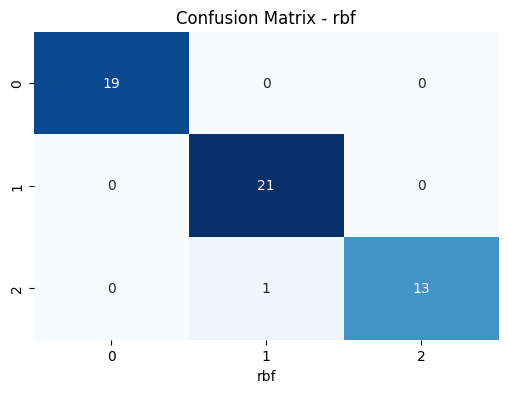

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 분할
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# 데이터 정규화 (SVM의 성능을 향상시키기 위해 필요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    'Linear Kernel': 'linear',
    'Polynomial Kernel': 'poly',
    'RBF Kernel': 'rbf'
}

# 커널 SVC 모델 생성 및 학습
def evaluate_model(kernel, X_train, y_train, X_test, y_test):
    svm = SVC(kernel=kernel, C=1.0, random_state=42)
    svm.fit(X_train, y_train)

    # 예측
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{kernel} Accuracy: {accuracy:.4f}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {kernel}")
    plt.xlabel(kernel)
    plt.show()
    print()



# 데이터 학습
for name, kernel in models.items():
    print(f'Model: {name}')
    evaluate_model(kernel, X_train, y_train, X_test, y_test)

실제 평가 결과를 통해 각 커널의 성능을 비교해 보면 다음과 같은 결론을 얻을 수 있습니다:

- Linear Kernel: 데이터가 선형적으로 분리될 수 있는 경우 적합합니다. Wine 데이터셋에서 높은 정확도를 보입니다.
- Polynomial Kernel: 데이터가 다항식 경계를 가질 때 적합합니다. Wine 데이터셋에서는 선형 커널에 비해 다소 낮은 정확도를 보일 수 있습니다.
- RBF Kernel: 데이터가 비선형 경계를 가질 때 적합합니다. Wine 데이터셋에서 매우 높은 정확도를 보입니다.

Wine 데이터셋에서는 Linear Kernel이 가장 적합할 수 있습니다. 이는 데이터가 선형적으로 잘 분리될 수 있기 때문입니다. 그러나 실제로는 각 커널의 성능을 교차 검증을 통해 비교하고, 데이터의 특성에 따라 최적의 커널을 선택합니다.

Task2_0724. breast_cancer dataset으로 랜덤포레스트를 적용하여 모델링 및 평가를 아래의 하이퍼 파라미터를 이용하여 수행한 후 최적의 하이퍼파라미터를 구하세요.

- 'n_estimators': [50, 100, 200],
- 'max_depth': [None, 10, 20],
- 'max_features': ['auto', 'sqrt', 'log2'],
- 'min_samples_split': [2, 5, 10],
- 'min_samples_leaf': [1, 2, 4]

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import product

# Load the dataset
cancer = load_breast_cancer()

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# Define the hyperparameters to search over
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use product to create a Cartesian product of all hyperparameter combinations
hyperparameter_combinations = product(
    hyperparameters['n_estimators'],
    hyperparameters['max_depth'],
    hyperparameters['max_features'],
    hyperparameters['min_samples_split'],
    hyperparameters['min_samples_leaf']
)
accuracy_data = []
best_accuracy = 0
best_ac_data = []

# Use GridSearchCV to find the best hyperparameters
def evaluate_model(n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf, X_train, y_train, X_test, y_test):
    rfc = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )



    # Train the model using the training sets
    rfc.fit(X_train, y_train)

    # Predict the response for the test dataset
    pred = rfc.predict(X_test)

    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, pred)
    accuracy_data.append([n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf, accuracy])
    print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, max_features: {max_features}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}")
    print(f"Accuracy: {accuracy:.4f}")
    print()

# Iterate over all combinations of hyperparameters
for params in hyperparameter_combinations:
    evaluate_model(*params, X_train, y_train, X_test, y_test)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: None, max_features: auto, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: None, max_features: auto, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: None, max_features: auto, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: None, max_features: auto, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: None, max_features: auto, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: None, max_features: auto, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: None, max_features: auto, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: None, max_features: auto, min_samples_split: 10, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: None, max_features: auto, min_samples_split: 10, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 50, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: None, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: None, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 50, max_depth: None, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: None, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: None, max_features: sqrt, min_samples_split: 10, 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 10, max_features: auto, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 10, max_features: auto, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 10, max_features: auto, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: auto, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 10, max_features: auto, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: auto, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 10, max_features: auto, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: auto, min_samples_split: 10, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 10, max_features: auto, min_samples_split: 10, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: 10, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 20, max_features: auto, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: auto, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 20, max_features: auto, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: auto, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 20, max_features: auto, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: auto, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 20, max_features: auto, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: auto, min_samples_split: 10, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 50, max_depth: 20, max_features: auto, min_samples_split: 10, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 50, max_depth: 20, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: None, max_features: auto, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: None, max_features: auto, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: None, max_features: auto, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: None, max_features: auto, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: None, max_features: auto, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: None, max_features: auto, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: None, max_features: auto, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: None, max_features: auto, min_samples_split: 10, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: None, max_features: auto, min_samples_split: 10, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_sp

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 10, max_features: auto, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 10, max_features: auto, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 10, max_features: auto, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 10, max_features: auto, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 10, max_features: auto, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 10, max_features: auto, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 10, max_features: auto, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 10, max_features: auto, min_samples_split: 10, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 10, max_features: auto, min_samples_split: 10, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 100, max_depth: 10, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 100, max_depth: 10, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 100, max_depth: 10, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 100, max_depth: 10, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 100, max_depth: 10, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 100, max_depth: 10, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 100, max_depth: 10, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 100, max_depth: 10, max_features: sqrt, min_samples_split: 10, min_sampl

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 20, max_features: auto, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 20, max_features: auto, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 20, max_features: auto, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 20, max_features: auto, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 20, max_features: auto, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 20, max_features: auto, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 20, max_features: auto, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 20, max_features: auto, min_samples_split: 10, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 100, max_depth: 20, max_features: auto, min_samples_split: 10, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 100, max_depth: 20, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 100, max_depth: 20, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 100, max_depth: 20, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 100, max_depth: 20, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 100, max_depth: 20, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 100, max_depth: 20, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 100, max_depth: 20, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 100, max_depth: 20, max_features: sqrt, min_samples_split: 10, min_sampl

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: None, max_features: auto, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: None, max_features: auto, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: None, max_features: auto, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: None, max_features: auto, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: None, max_features: auto, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: None, max_features: auto, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: None, max_features: auto, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: None, max_features: auto, min_samples_split: 10, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: None, max_features: auto, min_samples_split: 10, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 200, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 200, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 200, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 200, max_depth: None, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 200, max_depth: None, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 200, max_depth: None, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 200, max_depth: None, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 200, max_depth: None, max_features: sqrt, min_samples_sp

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 10, max_features: auto, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 10, max_features: auto, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 10, max_features: auto, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 10, max_features: auto, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 10, max_features: auto, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 10, max_features: auto, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 10, max_features: auto, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 10, max_features: auto, min_samples_split: 10, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 10, max_features: auto, min_samples_split: 10, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 200, max_depth: 10, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 200, max_depth: 10, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 200, max_depth: 10, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 200, max_depth: 10, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 200, max_depth: 10, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 200, max_depth: 10, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 200, max_depth: 10, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 200, max_depth: 10, max_features: sqrt, min_samples_split: 10, min_sampl

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 20, max_features: auto, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 20, max_features: auto, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 20, max_features: auto, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 20, max_features: auto, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 20, max_features: auto, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 20, max_features: auto, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 20, max_features: auto, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 20, max_features: auto, min_samples_split: 10, min_samples_leaf: 2
Accuracy: 0.9649



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


n_estimators: 200, max_depth: 20, max_features: auto, min_samples_split: 10, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 200, max_depth: 20, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 200, max_depth: 20, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 200, max_depth: 20, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 200, max_depth: 20, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 200, max_depth: 20, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 2
Accuracy: 0.9649

n_estimators: 200, max_depth: 20, max_features: sqrt, min_samples_split: 5, min_samples_leaf: 4
Accuracy: 0.9649

n_estimators: 200, max_depth: 20, max_features: sqrt, min_samples_split: 10, min_samples_leaf: 1
Accuracy: 0.9649

n_estimators: 200, max_depth: 20, max_features: sqrt, min_samples_split: 10, min_sampl

In [ ]:
for ac in accuracy_data:
    if ac[5].max():
        best_accuracy = ac[5]
        for i in best_accuracy

            best_ac_data.append(ac)
            print(best_ac_data)

In [ ]:
for ac in accuracy_data:
    if ac[5] > 0.97:
        print(ac)


[50, None, 'log2', 2, 2, 0.9736842105263158]
[50, None, 'log2', 5, 1, 0.9736842105263158]
[50, None, 'log2', 5, 2, 0.9736842105263158]
[50, 10, 'log2', 2, 2, 0.9736842105263158]
[50, 10, 'log2', 5, 1, 0.9736842105263158]
[50, 10, 'log2', 5, 2, 0.9736842105263158]
[50, 20, 'log2', 2, 2, 0.9736842105263158]
[50, 20, 'log2', 5, 1, 0.9736842105263158]
[50, 20, 'log2', 5, 2, 0.9736842105263158]


In [ ]:
# 강사님 버전

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

n_estimators: 10
Accuracy: 0.96
Confusion Matrix:
[[ 60   3]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



n_estimators: 50
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



n_estimators: 100
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

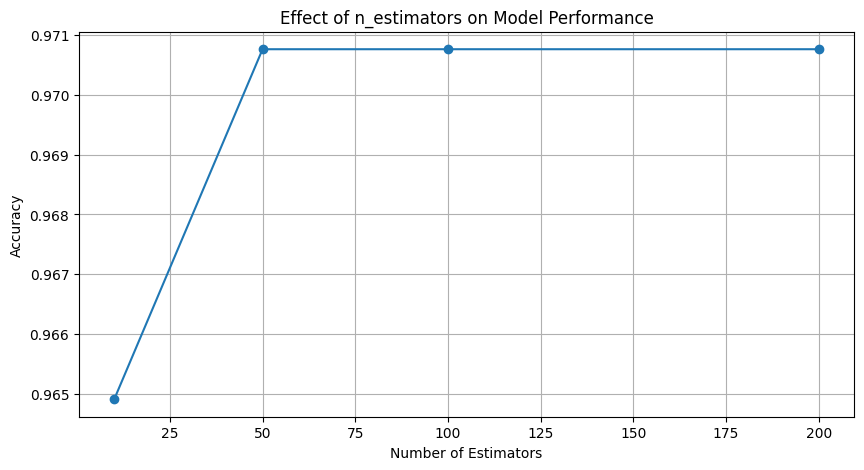

max_depth: 5
Accuracy: 0.96
Confusion Matrix:
[[ 59   4]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



max_depth: 10
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_depth: 20
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

         

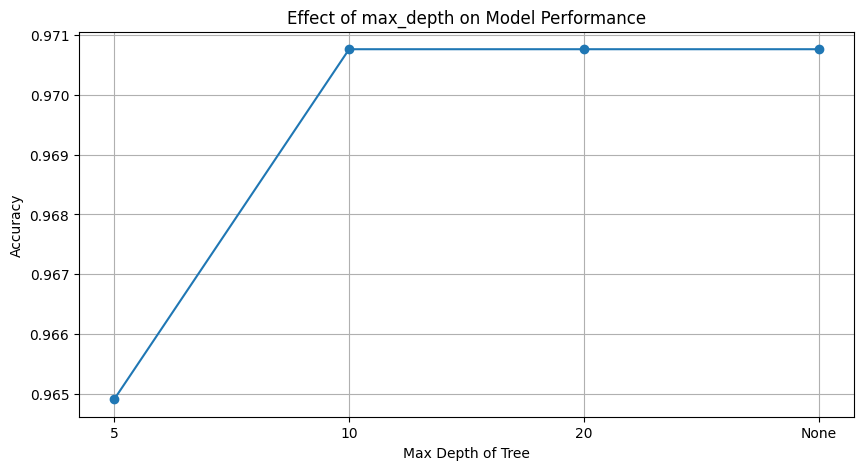

max_features: sqrt
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_features: log2
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171





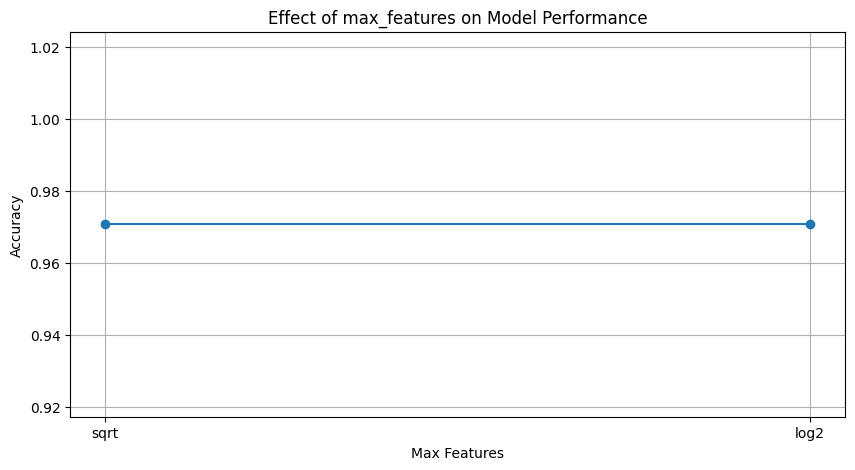

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# 1. n_estimators (트리의 개수)
n_estimators_range = [10, 50, 100, 200]
n_estimators_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    n_estimators_scores.append(score)
    print(f'n_estimators: {n}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# n_estimators 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, n_estimators_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on Model Performance')
plt.grid(True)
plt.show()

# 2. max_depth (트리의 최대 깊이)
max_depth_range = [5, 10, 20, None]
max_depth_scores = []

for depth in max_depth_range:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_depth_scores.append(score)
    print(f'max_depth: {depth}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# max_depth 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot([str(d) for d in max_depth_range], max_depth_scores, marker='o')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Model Performance')
plt.grid(True)
plt.show()

# 3. max_features (각 분할에서 고려할 최대 특성 수)
max_features_range = ['sqrt', 'log2']
max_features_scores = []

for feature in max_features_range:
    rf = RandomForestClassifier(max_features=feature, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_features_scores.append(score)
    print(f'max_features: {feature}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# max_features 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(max_features_range, max_features_scores, marker='o')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Effect of max_features on Model Performance')
plt.grid(True)
plt.show()


Task3_0723. 훈련을 개선 시키세요

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data_org = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

In [ ]:
data = data_org.copy()

# 2. 계측치 처리
data.dropna(inplace=True)

# 3. 이상치 제거 (여기서는 'capital-gain' 과 'capital-loss'에서 극단적인 값들을 이상치로 가정)
Q1 = data['capital-gain'].quantile(0.25)
Q3 = data['capital-gain'].quantile(0.75)
IQR = Q3 - Q1

capital_gain_outliers = data[(data['capital-gain'] < Q1 - 1.5 * IQR) | (data['capital-gain'] > Q3 + 1.5 * IQR)]
print(capital_gain_outliers)

Q1 = data['capital-loss'].quantile(0.25)
Q3 = data['capital-loss'].quantile(0.75)
IQR = Q3 - Q1

capital_loss_outliers = data[(data['capital-loss'] < Q1 - 1.5 * IQR) | (data['capital-loss'] > Q3 + 1.5 * IQR)]
print(capital_loss_outliers)

data = data.drop(capital_gain_outliers.index)
data = data.drop(capital_loss_outliers.index)

# 4. 파생변수 작성
data['capital_diff'] = data['capital-gain'] - data['capital-loss']

       age         workclass  fnlwgt    education  education-num  \
0       39         State-gov   77516    Bachelors             13   
8       31           Private   45781      Masters             14   
9       42           Private  159449    Bachelors             13   
59      30           Private  188146      HS-grad              9   
60      30           Private   59496    Bachelors             13   
...    ...               ...     ...          ...            ...   
32515   66       Federal-gov   47358         10th              6   
32518   57         Local-gov  110417      HS-grad              9   
32538   38           Private  139180    Bachelors             13   
32548   65  Self-emp-not-inc   99359  Prof-school             15   
32560   52      Self-emp-inc  287927      HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
8           Never-married  

In [ ]:
# 'age' 컬럼의 이상치를 평균값으로 대체
age_mean = data['age'].mean()
data['age'] = data['age'].apply(lambda x : x if x <= 74 else age_mean)

# 'education-num' 컬럼의 이상치를 평균값으로 대체
education_num_mean = data['education-num'].mean()
data['education-num'] = data['education-num'].apply(lambda x : x if x >= 5 else education_num_mean)

In [ ]:
# 범주형 변수 인코딩
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_diff
1,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,0
2,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,0
3,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,0
4,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,0
5,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,United-States,0,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 리스트
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

# LabelEncoder 객체 생성
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# 결과 출력
print(data)

        age  workclass  fnlwgt  education  education-num  marital-status  \
1      50.0          4   83311          9           13.0               2   
2      38.0          2  215646         11            9.0               0   
3      53.0          2  234721          1            7.0               2   
4      28.0          2  338409          9           13.0               2   
5      37.0          2  284582         12           14.0               2   
...     ...        ...     ...        ...            ...             ...   
32555  22.0          2  310152         15           10.0               4   
32556  27.0          2  257302          7           12.0               2   
32557  40.0          2  154374         11            9.0               2   
32558  58.0          2  151910         11            9.0               6   
32559  22.0          2  201490         11            9.0               4   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
1            

In [ ]:
print(data['fnlwgt'].max())
print(data['fnlwgt'].min())

1484705
13769


In [ ]:
print(data['fnlwgt'].mean())

190230.77127151965


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_diff,fnlwgt_cat
1,50.0,Self-emp-not-inc,83311,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,0,50K-100K
2,38.0,Private,215646,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,0,200K-250K
3,53.0,Private,234721,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,0,200K-250K
4,28.0,Private,338409,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,0,300K-500K
5,37.0,Private,284582,14.0,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,United-States,0,0,250K-300K


<Figure size 1500x800 with 0 Axes>

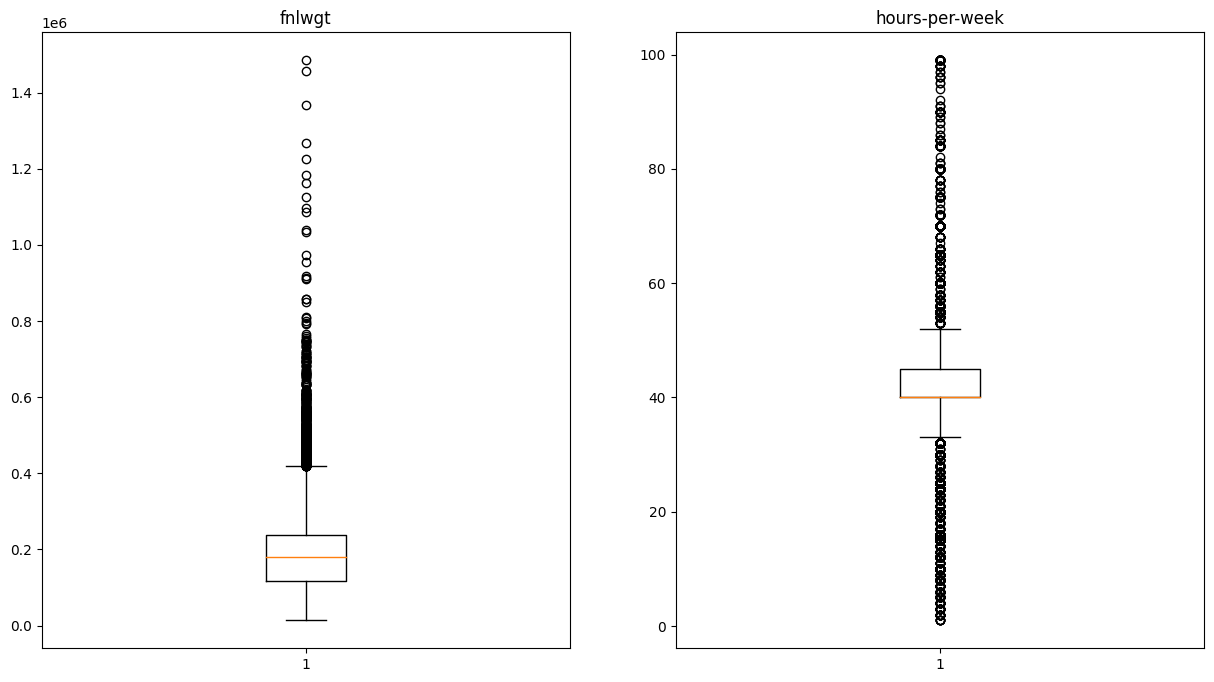

In [ ]:
# 숫자 이상치 탐색
plt.figure(figsize=(15, 8))
# data2_res = plt.boxplot(data1[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
#            'hours-per-week']])

data2_res = ['fnlwgt', 'hours-per-week']
# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# 각 서브플롯에 박스플롯 그리기
for i, var in enumerate(data2_res):
    axes[i].boxplot(data[var])
    axes[i].set_title(var)

plt.show()

In [ ]:
# fnlwgt 카테고리 생성
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 500000, 1000000, 1500000]
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K-500K', '500K-1M', '1M+']
data['fnlwgt_cat'] = pd.cut(data['fnlwgt'], bins=bins, labels=labels)

In [ ]:
# 안쓰는 컬럼 드랍
data = data.drop(['fnlwgt'], axis=1)

data = data.drop(['education'], axis=1)
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_diff,fnlwgt_cat
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,0,50K-100K
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,0,200K-250K
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,0,200K-250K
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,0,300K-500K
5,37.0,Private,14.0,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,United-States,0,0,250K-300K


In [ ]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_diff,fnlwgt_cat
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,0,50k-100k
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,0,100k-500k
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,0,100k-500k
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,0,100k-500k
5,37.0,Private,14.0,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,United-States,0,0,100k-500k


In [ ]:
# 5. 범주형 변수 인코딩
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'fnlwgt_cat']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26197 entries, 1 to 32559
Data columns (total 89 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        26197 non-null  float64
 1   education-num                              26197 non-null  float64
 2   sex                                        26197 non-null  int64  
 3   capital-gain                               26197 non-null  int64  
 4   capital-loss                               26197 non-null  int64  
 5   hours-per-week                             26197 non-null  int64  
 6   income                                     26197 non-null  int64  
 7   capital_diff                               26197 non-null  int64  
 8   workclass_Local-gov                        26197 non-null  bool   
 9   workclass_Private                          26197 non-null  bool   
 10  workclass_Self-emp-inc     

In [ ]:
data.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,capital_diff,workclass_Local-gov,workclass_Private,...,native-country_Vietnam,native-country_Yugoslavia,fnlwgt_cat_50K-100K,fnlwgt_cat_100K-150K,fnlwgt_cat_150K-200K,fnlwgt_cat_200K-250K,fnlwgt_cat_250K-300K,fnlwgt_cat_300K-500K,fnlwgt_cat_500K-1M,fnlwgt_cat_1M+
1,50.0,13.0,0,0,0,13,0,0,False,False,...,False,False,True,False,False,False,False,False,False,False
2,38.0,9.0,0,0,0,40,0,0,False,True,...,False,False,False,False,False,True,False,False,False,False
3,53.0,7.0,0,0,0,40,0,0,False,True,...,False,False,False,False,False,True,False,False,False,False
4,28.0,13.0,1,0,0,40,0,0,False,True,...,False,False,False,False,False,False,False,True,False,False
5,37.0,14.0,1,0,0,40,0,0,False,True,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# 6. 변수 선택 및 데이터 분리
X = data.drop('income', axis=1)
y = data['income']


# 7. 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 8. 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 9. 로지스틱 회귀 모델 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 10. 예측 및 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {round(accuracy,4)}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8543
Confusion Matrix:
[[5957  380]
 [ 765  758]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6337
           1       0.67      0.50      0.57      1523

    accuracy                           0.85      7860
   macro avg       0.78      0.72      0.74      7860
weighted avg       0.84      0.85      0.85      7860



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
